In [81]:
import pandas as pd
import csv
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import datasets, linear_model
df = pd.read_csv('/Users/vijayswamy/Data_Science/GA-DSI/project-2/data/train.csv', header = None)

In [73]:
#to rename the columns to those in the first row
df.rename(columns=df.iloc[0], inplace = True)

In [74]:
#drop this row as it is redundant
df.drop(df.index[0], inplace = True)

In [75]:
#since there are 81 columns, it's better to run a for loop than convert the integer or float types manually
for column in df.columns:
    try:
        df[column] = df[column].apply(pd.to_numeric)
    except:
        pass

In [76]:
#test to ensure the variables have been changed from object to float or int as done in the previous test
df.dtypes

Id                  int64
PID                 int64
MS SubClass         int64
MS Zoning          object
Lot Frontage      float64
Lot Area            int64
Street             object
Alley              object
Lot Shape          object
Land Contour       object
Utilities          object
Lot Config         object
Land Slope         object
Neighborhood       object
Condition 1        object
Condition 2        object
Bldg Type          object
House Style        object
Overall Qual        int64
Overall Cond        int64
Year Built          int64
Year Remod/Add      int64
Roof Style         object
Roof Matl          object
Exterior 1st       object
Exterior 2nd       object
Mas Vnr Type       object
Mas Vnr Area      float64
Exter Qual         object
Exter Cond         object
                   ...   
Half Bath           int64
Bedroom AbvGr       int64
Kitchen AbvGr       int64
Kitchen Qual       object
TotRms AbvGrd       int64
Functional         object
Fireplaces          int64
Fireplace Qu

In [77]:
#test 2 to make sure the objects that are int or float are in fact converted
df.describe()

Id           PID  MS SubClass  Lot Frontage       Lot Area  \
count  2051.000000  2.051000e+03  2051.000000   1721.000000    2051.000000   
mean   1474.033642  7.135900e+08    57.008776     69.055200   10065.208191   
std     843.980841  1.886918e+08    42.824223     23.260653    6742.488909   
min       1.000000  5.263011e+08    20.000000     21.000000    1300.000000   
25%     753.500000  5.284581e+08    20.000000     58.000000    7500.000000   
50%    1486.000000  5.354532e+08    50.000000     68.000000    9430.000000   
75%    2198.000000  9.071801e+08    70.000000     80.000000   11513.500000   
max    2930.000000  9.241520e+08   190.000000    313.000000  159000.000000   

       Overall Qual  Overall Cond   Year Built  Year Remod/Add  Mas Vnr Area  \
count   2051.000000   2051.000000  2051.000000     2051.000000   2029.000000   
mean       6.112140      5.562165  1971.708922     1984.190151     99.695909   
std        1.426271      1.104497    30.177889       21.036250    174.963129   
min        1.000000      1.000000  1872.000000     1950.000000      0.000000   
25%        5.000000      5.000000  1953.500000     1964.500000      0.000000   
50%        6.000000      5.000000  1974.000000     1993.000000      0.000000   
75%        7.000000      6.000000  2001.000000     2004.000000    161.000000   
max       10.000000      9.000000  2010.000000     2010.000000   1600.000000   

           ...        Wood Deck SF  Open Porch SF  Enclosed Porch  \
count      ...         2051.000000    2051.000000     2051.000000   
mean       ...           93.833740      47.556802       22.571916   
std        ...          128.549416      66.747241       59.845110   
min        ...            0.000000       0.000000        0.000000   
25%        ...            0.000000       0.000000        0.000000   
50%        ...            0.000000      27.000000        0.000000   
75%        ...          168.000000      70.000000        0.000000   
max        ...         1424.000000     547.000000      432.000000   

        3Ssn Porch  Screen Porch    Pool Area      Misc Val      Mo Sold  \
count  2051.000000   2051.000000  2051.000000   2051.000000  2051.000000   
mean      2.591419     16.511458     2.397855     51.574354     6.219893   
std      25.229615     57.374204    37.782570    573.393985     2.744736   
min       0.000000      0.000000     0.000000      0.000000     1.000000   
25%       0.000000      0.000000     0.000000      0.000000     4.000000   
50%       0.000000      0.000000     0.000000      0.000000     6.000000   
75%       0.000000      0.000000     0.000000      0.000000     8.000000   
max     508.000000    490.000000   800.000000  17000.000000    12.000000   

           Yr Sold      SalePrice  
count  2051.000000    2051.000000  
mean   2007.775719  181469.701609  
std       1.312014   79258.659352  
min    2006.000000   12789.000000  
25%    2007.000000  129825.000000  
50%    2008.000000  162500.000000  
75%    2009.000000  214000.000000  
max    2010.000000  611657.000000  

[8 rows x 39 columns]

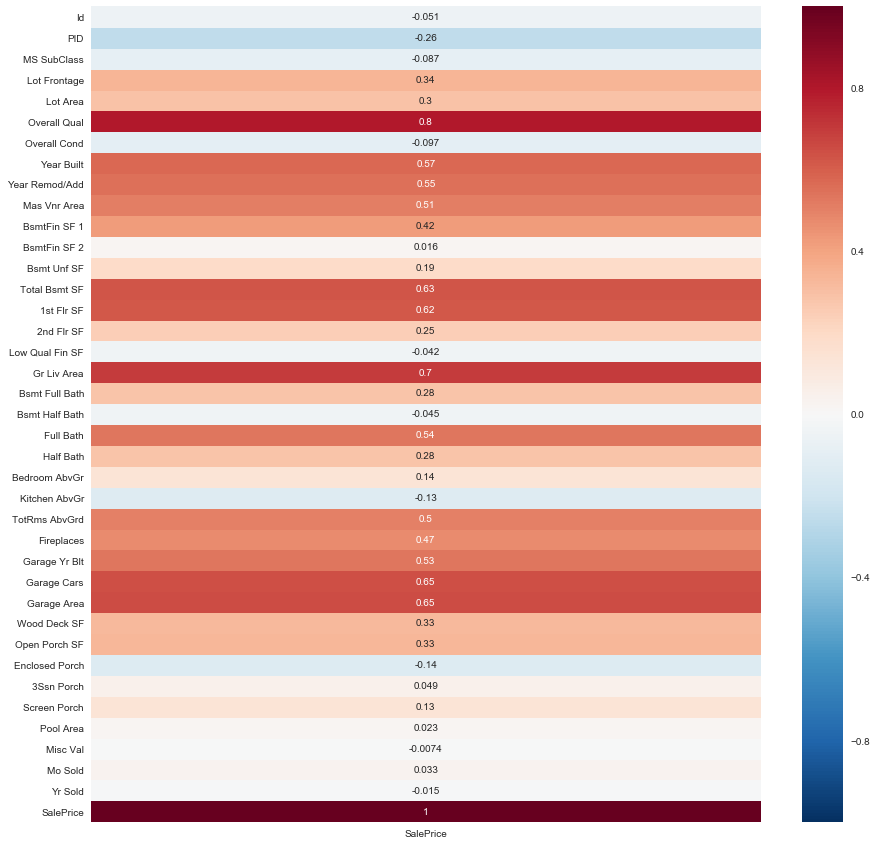

In [79]:
#to see which variables are correlated with the sale price
plt.figure(figsize=(15,15))
sns.heatmap(df.corr()['SalePrice'].to_frame(), annot=True)

In [82]:
regr = linear_model.LinearRegression()